In [69]:
# импорт необходимых библиотек
import pandas as pd
import geopandas as gpd
import folium
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

In [70]:
from tqdm.notebook import tqdm

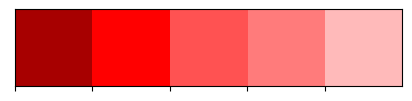

In [100]:
# задание палитры цветов
colors = ['#a70000', '#ff0000', '#ff5252', '#ff7b7b', '#ffbaba']
sns.palplot(sns.color_palette(colors))

### Анализ геоданных Московской агломерации

In [71]:
# считывание данных с геоданными Московской агломерации
adm = pd.read_csv('data/adm2fishnet.csv', sep=';')

In [72]:
# проверка вывода данных
adm.head()

,WKT,cell_zid,adm_name,okrug_name,sub_ter
0,MULTIPOLYGON (((38.6495389842383 54.2597139180...,0,Серебряные пруды,NaN,Московская область
1,MULTIPOLYGON (((38.6549362377517 54.2572466621...,1,Серебряные пруды,NaN,Московская область
2,MULTIPOLYGON (((38.6625773861122 54.2560891872...,2,Серебряные пруды,NaN,Московская область
3,MULTIPOLYGON (((38.670279125503 54.25708620909...,3,Серебряные пруды,NaN,Московская область
4,MULTIPOLYGON (((38.6779821287111 54.2581143832...,4,Серебряные пруды,NaN,Московская область


In [73]:
# проверка на наличие пропусков
adm.isna().sum()

WKT                0
cell_zid           0
adm_name           0
okrug_name    189561
sub_ter            0
dtype: int64

В наименованиях округа присутствует **189 561** пропусков в значениях данных

In [74]:
# вывод размерности данных
adm.shape

(203634, 5)

В данных представлены сведения о **203 634** секторах Московской агломерации

In [194]:
# вывод количества округов, субъектов и административных районов Московской агломерации
names_count = adm[['adm_name', 'okrug_name', 'sub_ter']].nunique(dropna=True).to_frame().rename(columns={0:'count'})
names_count

,count
adm_name,206
okrug_name,12
sub_ter,3


In [195]:
# показатели
names_count.index = ['Административных районов', 'Округов', 'Субъектов']

In [196]:
names_count['loc'] = [1, 1, 1]

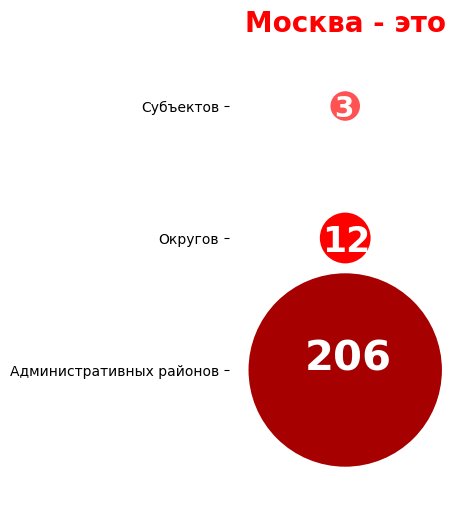

In [248]:
# визуализация количества округов, субъектов и административных районов Московской агломерации
fig, ax = plt.subplots(figsize=(3, 6))
sns.scatterplot(data=names_count, x=names_count['loc'], y=names_count.index, size=names_count['count'], \
                sizes=[550, 1500, 20000], hue=names_count['count'], legend=False, palette=sns.color_palette(colors)[2::-1])
plt.annotate(206, xy=(0.981, 10**-7), fontsize=30, weight='bold', c='w')
plt.annotate(12, xy=(0.989, 0.9), fontsize=25, weight='bold', c='w')
plt.annotate(3, xy=(0.995, 1.92), fontsize=20, weight='bold', c='w')
plt.ylim(-1,2.5)
plt.box(on=None)
plt.xticks([])
plt.xlabel('')
plt.title('Москва - это', loc='center', fontweight='bold', color='r', fontsize=20)
plt.show()

В данных представлены сведения по:
* **3** субъектам 
* **12** округам Московской агломерации
* **206** административному району Московской агломерации

In [9]:
# уникальные наименования административных районов, где имеются пропуски в значениях наименования округа
adm[adm['okrug_name'].isna()]['adm_name'].unique()

array(['Серебряные пруды', 'Зарайск', 'Кашира', 'Серпухов', 'Луховицы',
       'Коломна', 'Пущино', 'Ступино', 'Протвино', 'Чехов', 'Егорьевск',
       'Шатура', 'Домодедово', 'Наро-Фоминск', 'Воскресенск', 'Раменское',
       'Можайск', 'Подольск', 'Молодежный', 'Руза', 'Бронницы',
       'Орехово-Зуево', 'Одинцово', 'Видное (Ленинский)', 'Жуковский',
       'Лыткарино', 'Люберцы', 'Краснознаменск', 'Дзержинский',
       'Павловский Посад', 'Котельники', 'Власиха',
       'Ногинск (Богородский)', 'Электросталь', 'Балашиха', 'Волоколамск',
       'Красногорск', 'Реутов', 'Истра', 'Шаховская', 'Щелково',
       'Лосино-Петровский', 'Мытищи', 'Электрогорск', 'Королев',
       'Звездный городок', 'Химки', 'Солнечногорск', 'Долгопрудный',
       'Восход', 'Фрязино', 'Пушкино', 'Черноголовка', 'Лобня', 'Дмитров',
       'Клин', 'Лотошино', 'Сергиев Посад', 'Талдом', 'Дубна'],
      dtype=object)

Данные наименования административных районов в том числе являются и наименованиями округа

In [249]:
# получение индексов в данных где имеются пропуски значений наименования округа
okrug_name_nan_index = adm[adm['okrug_name'].isna()].index

In [250]:
# заполнение пропусков наименований округа аналогичным значением наименования района по соответствующему индексу в данных
for index in tqdm(okrug_name_nan_index):
    adm['okrug_name'][index] = adm['adm_name'][index]

  0%|          | 0/189561 [00:00<?, ?it/s]

C:\Users\rus_k\AppData\Local\Temp\ipykernel_13248\3966519248.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adm['okrug_name'][index] = adm['adm_name'][index]


In [251]:
# проверка заполнения пропусков
adm.isna().sum()

WKT           0
cell_zid      0
adm_name      0
okrug_name    0
sub_ter       0
dtype: int64

In [253]:
# проверка на дубликаты по секторам
adm['cell_zid'].size == adm['cell_zid'].nunique()

False

В данных присутствуют дубликаты полигонов по секторам

In [15]:
# проверка на дубликаты
adm['cell_zid'].value_counts().head()

114417    5
92031     5
107516    5
81220     4
97406     4
Name: cell_zid, dtype: int64

In [257]:
# проверка на дубликаты
unique, counts = np.unique(adm['cell_zid'], return_counts=True)

In [258]:
# количество дубликатов по секторам
len(unique[counts > 1])

13097

В данных присутствуют дубликаты по **13 097** сектору

In [268]:
# количество повторов в % соотношении
round(len(unique[counts > 1]) / adm['cell_zid'].nunique() * 100, 2)

6.9

Что составляет около **7%** повторов

In [290]:
# случайная выборка двух секторов
np.random.choice(unique[counts > 1], 2)

array([125492, 142892], dtype=int64)

In [291]:
# вывод данных по сектору 125492
adm[adm['cell_zid'] == 125492]

,WKT,cell_zid,adm_name,okrug_name,sub_ter
135440,MULTIPOLYGON (((37.4082045256308 55.8822646103...,125492,Куркино,Северо-Западный административный округ,Старая Москва
135441,MULTIPOLYGON (((37.4081971815743 55.8853763674...,125492,Химки,Химки,Московская область


In [292]:
# вывод данных по сектору 142892
adm[adm['cell_zid'] == 142892]

,WKT,cell_zid,adm_name,okrug_name,sub_ter
154547,MULTIPOLYGON (((38.5152768668807 56.0487920847...,142892,Ногинск (Богородский),Ногинск (Богородский),Московская область
154548,MULTIPOLYGON (((38.5153859642896 56.0529449340...,142892,Щелково,Щелково,Московская область


Видно, что данные по сектору относятся к разным административным районам. Возможно в сектор попала их граница

In [293]:
# импорт библиотеки для работы с географическими координатами
from shapely import wkt

In [294]:
# переименование признака
adm = adm.rename(columns={'WKT':'geometry'})

In [295]:
# преобразование признака в географические координаты
adm['geometry'] = adm['geometry'].apply(wkt.loads)

In [296]:
# задание геометрии DataFrame
adm = adm.set_geometry('geometry')

In [300]:
# расчет площади сектора
adm['area'] = adm['geometry'].area 

In [307]:
# задание формата отображения чисел
pd.options.display.float_format ='{:,.6f}'.format

In [308]:
# сводная статистика по значению площади сектоар
adm['area'].describe()

count   203,634.000000
mean          0.000033
std           0.000008
min           0.000000
25%           0.000035
50%           0.000036
75%           0.000036
max           0.000037
Name: area, dtype: float64

Рассчитанная площадь отличается от условия задачи, где площадь одного сектора равна **0.5 $км^{2}$**

In [389]:
# присвоение значение площади сектора согласно условиям задачи
adm['area'] = 0.25

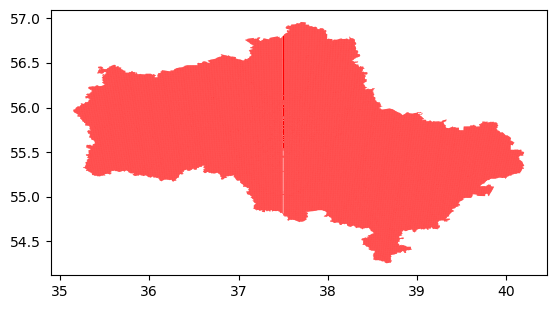

In [306]:
# визуализация DataFrame
adm.plot(color='r')
plt.show()

In [310]:
# вывод проекции
print(adm.crs)

None


In [311]:
# задание проектции
adm.crs = "epsg:3857"

In [312]:
# непосредственно преобразование проекции
adm = adm.to_crs({'init' :'epsg:3857'}) 

C:\Users\rus_k\anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [361]:
import matplotlib.colors as mcolors


def make_colormap(seq):
    
    """ функция создания пользовательского
            масштабируемого цвета """
    
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)

In [362]:
# задание палитры цветов красного
c = mcolors.ColorConverter().to_rgb
rvb = make_colormap(
    [c('darkred'), 0.20, c('brown'), 0.40, c('red'), 0.60, c('indianred'), 0.80, c('lightcoral')])

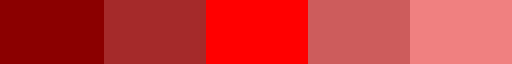

In [364]:
# вывод пользовательской палитры
rvb

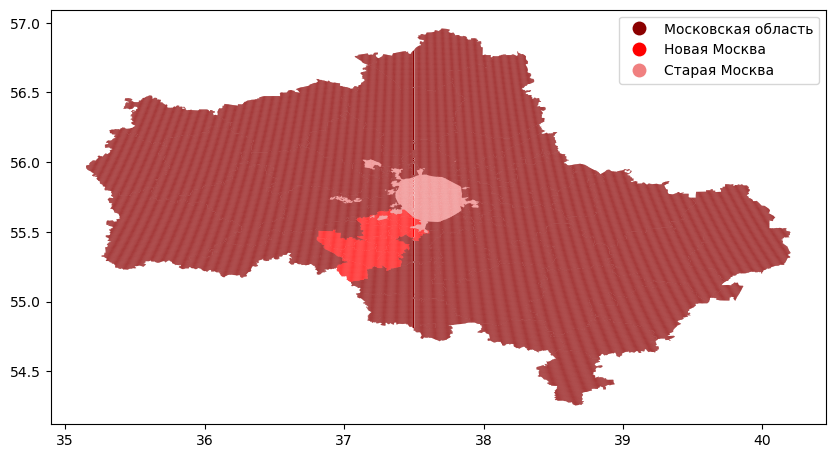

In [365]:
# визуализация субъектов Московской агломерации
adm.plot(column = 'sub_ter', linewidth=0.5, cmap=rvb, legend=True, figsize=[10,10])
plt.xlim(right=None)
plt.show()

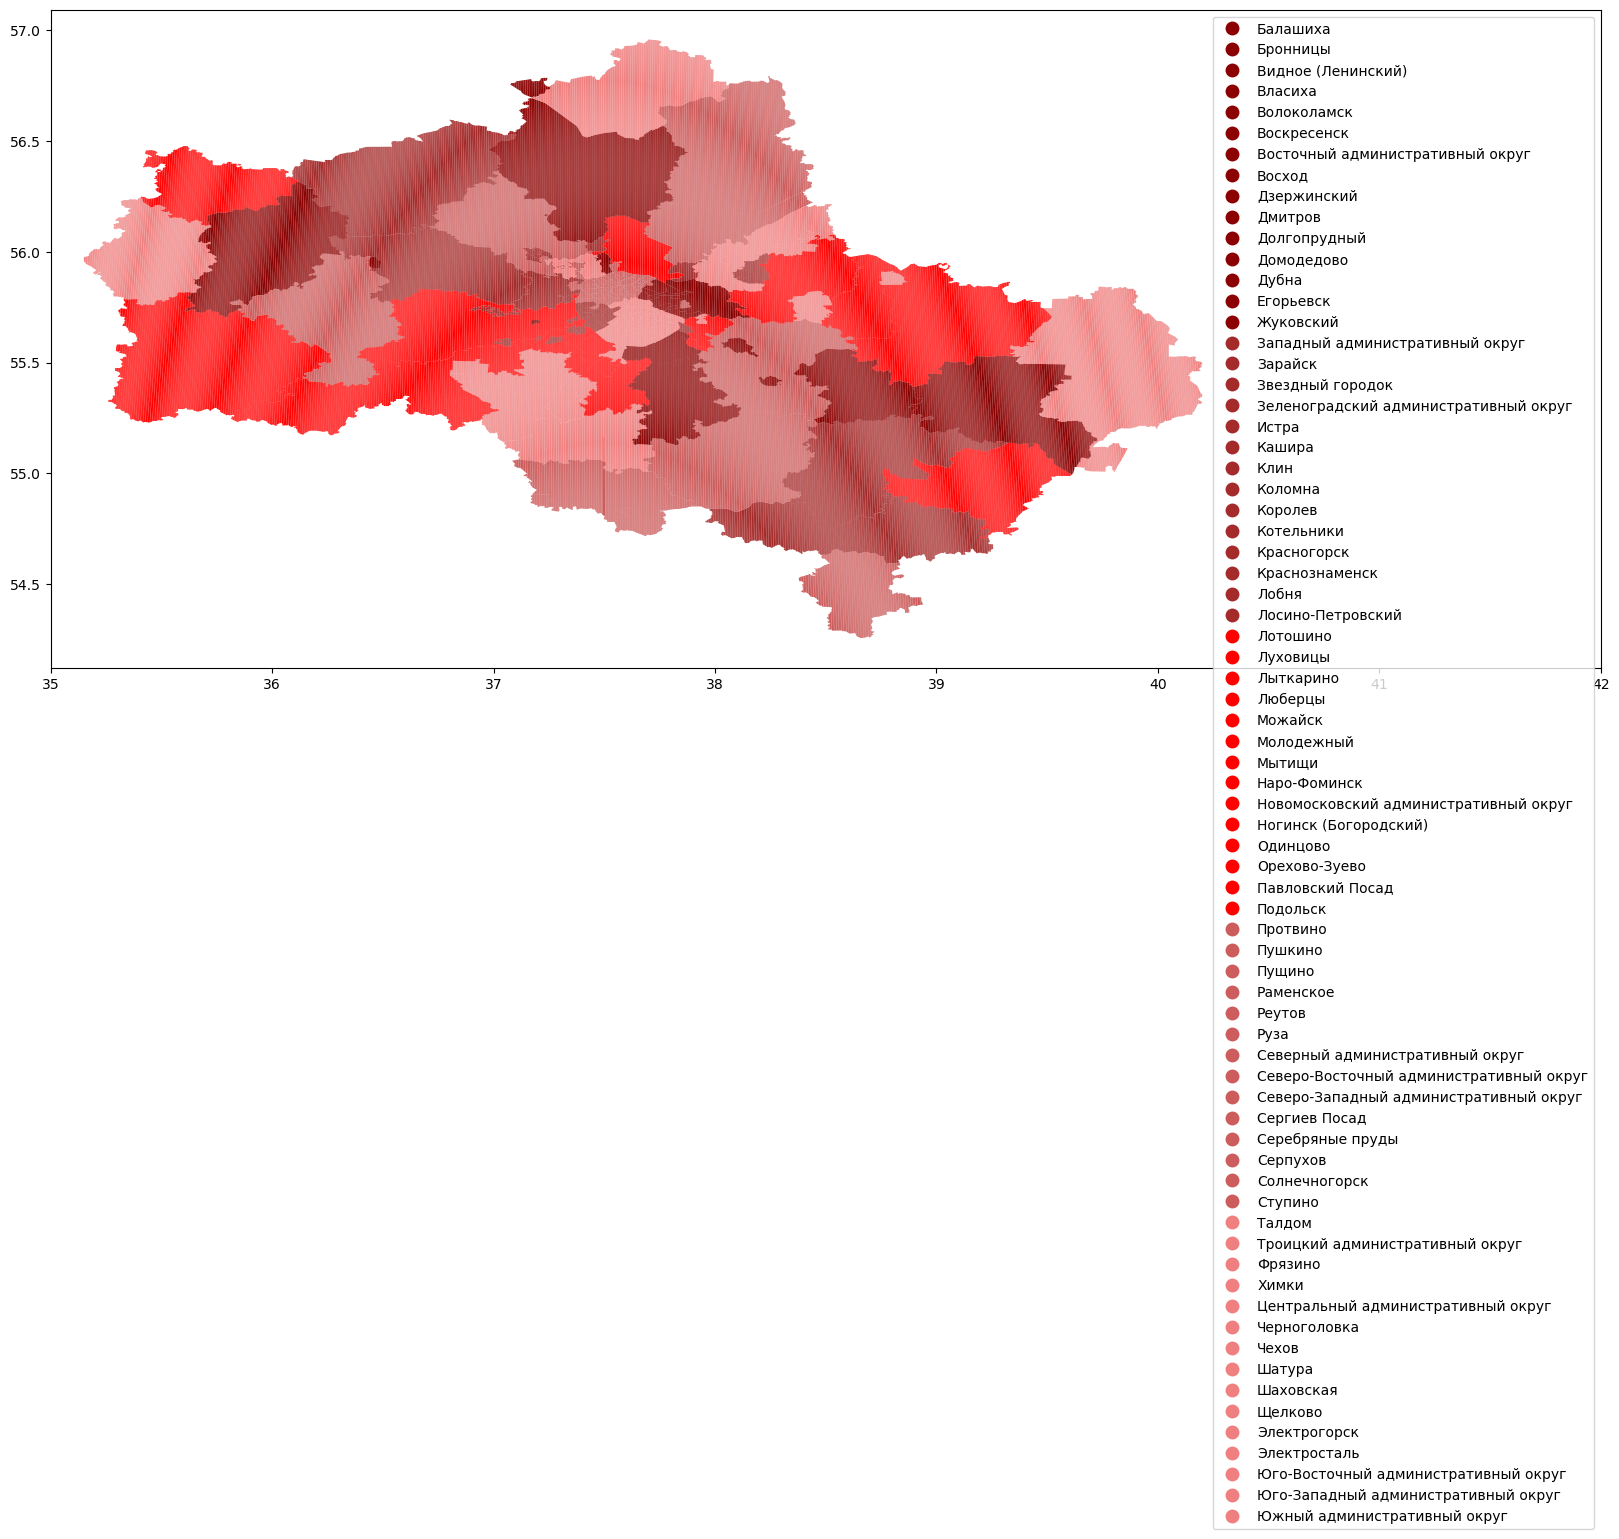

In [366]:
# визуализация округов Московской агломерации
adm.plot(column = 'okrug_name', linewidth=0.5, cmap=rvb, legend=True, figsize=[20,30])
plt.xlim(left=35, right=42)
plt.show()

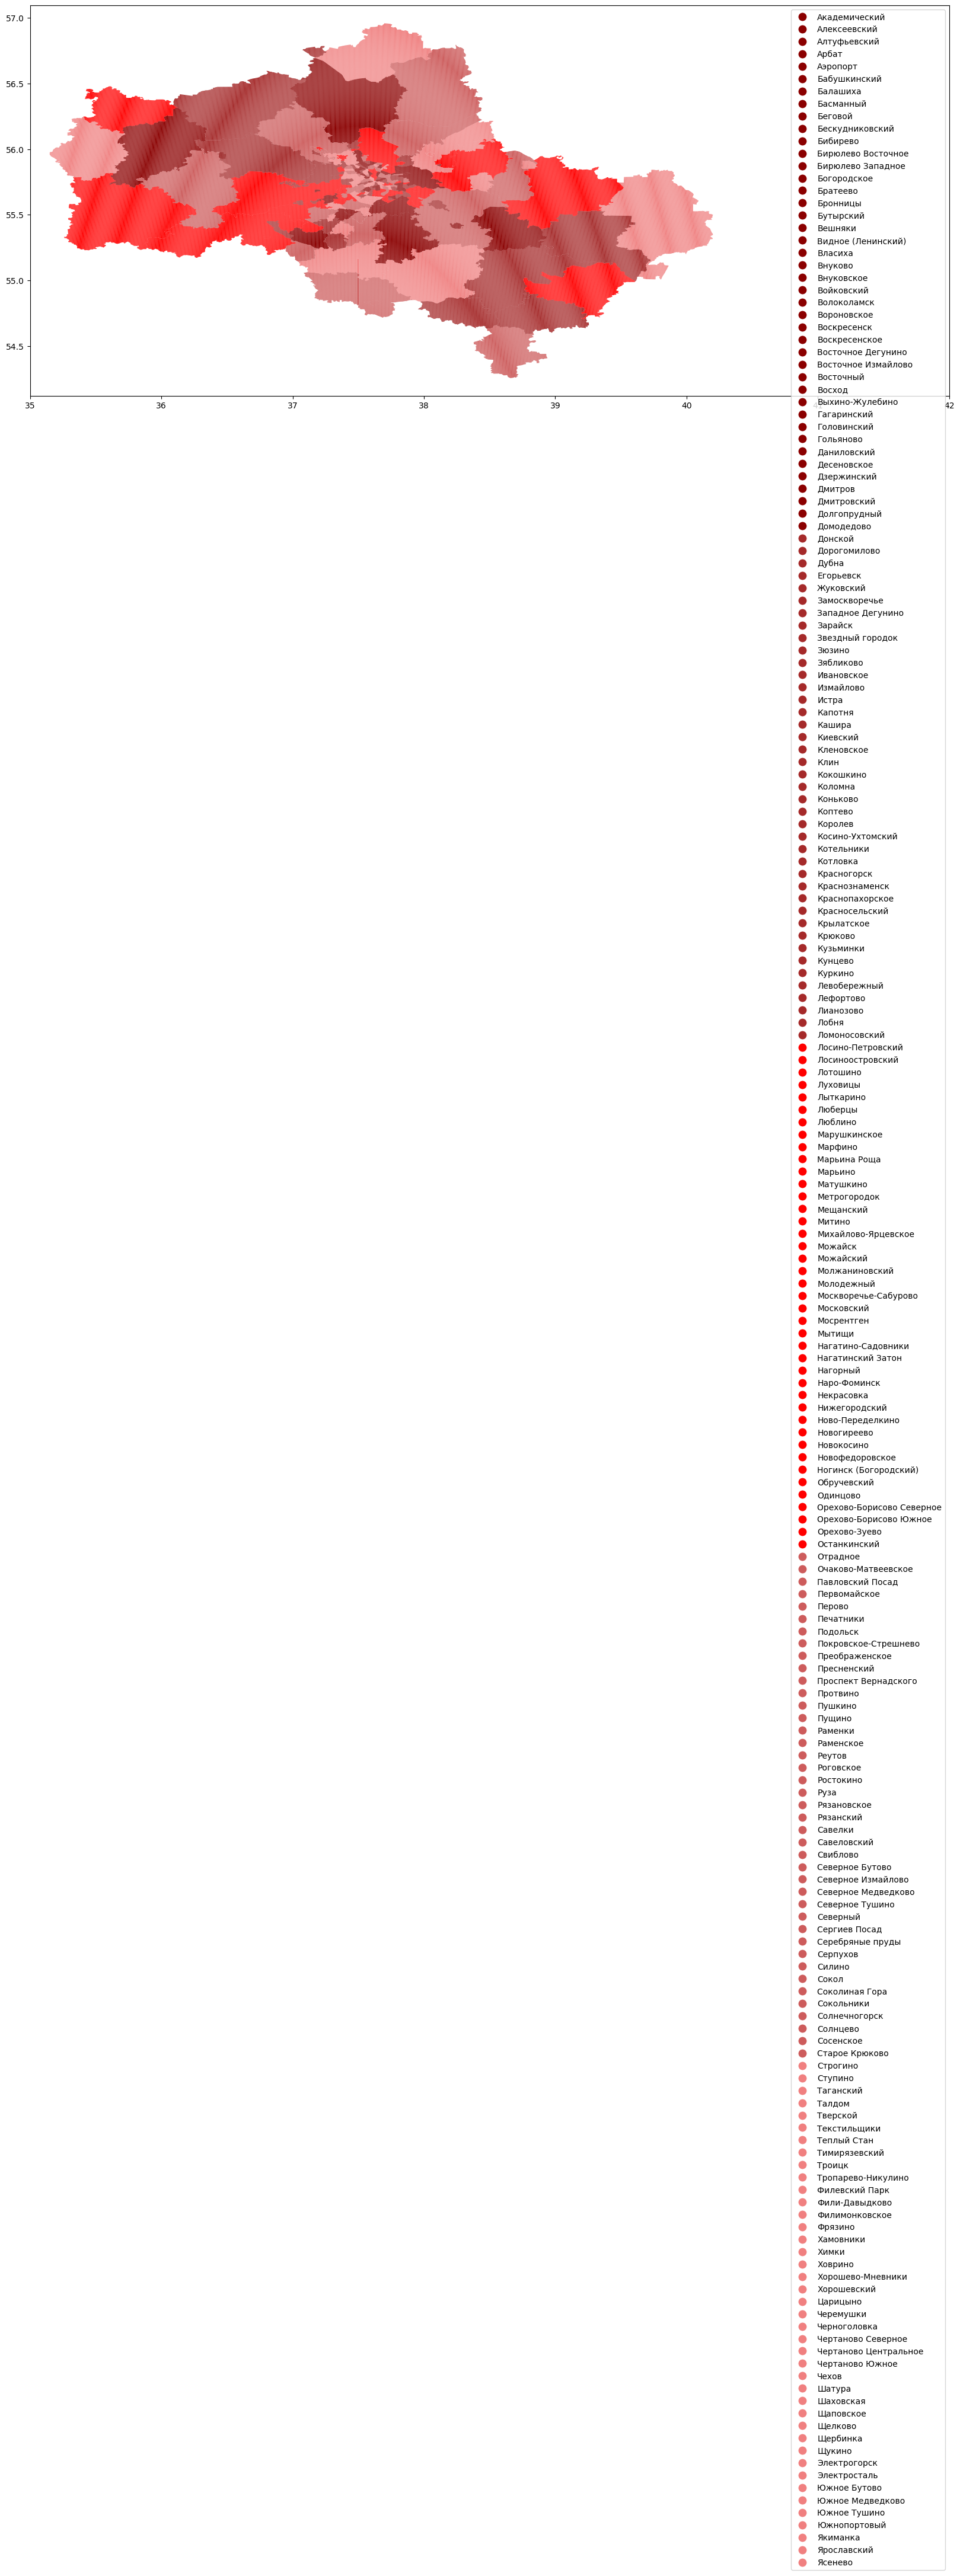

In [367]:
# визуализация административных районов Московской агломерации
adm.plot(column = 'adm_name', linewidth=0.5, cmap=rvb, legend=True, figsize=[20,30])
plt.xlim(left=35, right=42)
plt.show()

**Проверка гипотезы** - идентификаторы сектора с одинаковым значением являются границами административного района 

In [390]:
# случайная выборка двух секторов
np.random.choice(unique[counts > 3], 2)

array([ 81220, 127921], dtype=int64)

In [391]:
# вывод геоданных по сектору 127921
adm[adm['cell_zid'] == 81220]

,geometry,cell_zid,adm_name,okrug_name,sub_ter,area
85908,"MULTIPOLYGON (((37.401 55.541, 37.401 55.541, ...",81220,Сосенское,Новомосковский административный округ,Новая Москва,0.250000
85909,"MULTIPOLYGON (((37.393 55.536, 37.393 55.541, ...",81220,Десеновское,Новомосковский административный округ,Новая Москва,0.250000
85910,"MULTIPOLYGON (((37.399 55.541, 37.401 55.541, ...",81220,Филимонковское,Новомосковский административный округ,Новая Москва,0.250000
85911,"MULTIPOLYGON (((37.401 55.541, 37.401 55.536, ...",81220,Воскресенское,Новомосковский административный округ,Новая Москва,0.250000


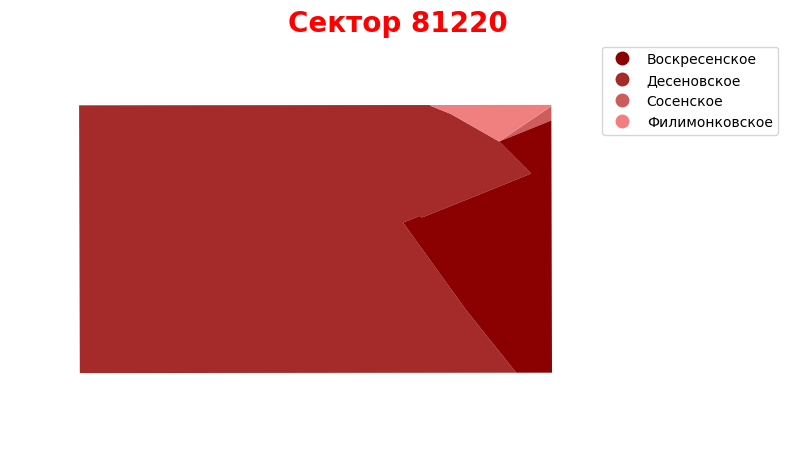

In [449]:
# вывод геоданных по сектору 81220
adm[adm['cell_zid'] == 81220].plot(column = 'adm_name', linewidth=0.5, cmap=rvb, legend=True, figsize=[10,10])
plt.xlim(37.392,37.405)
plt.ylim(55.535,55.542)
plt.title('Сектор 81220', loc='center', fontweight='bold', color='r', fontsize=20)
plt.box(on=None)
plt.xticks([])
plt.yticks([])
plt.show()

In [411]:
# вывод геоданных по сектору 127921
adm[adm['cell_zid'] == 127921]

,geometry,cell_zid,adm_name,okrug_name,sub_ter,area
138160,"MULTIPOLYGON (((37.536 55.909, 37.544 55.909, ...",127921,Северный,Северо-Восточный административный округ,Старая Москва,0.250000
138161,"MULTIPOLYGON (((37.536 55.907, 37.536 55.909, ...",127921,Долгопрудный,Долгопрудный,Московская область,0.250000
138162,"MULTIPOLYGON (((37.536 55.905, 37.536 55.905, ...",127921,Дмитровский,Северный административный округ,Старая Москва,0.250000
138163,"MULTIPOLYGON (((37.536 55.905, 37.536 55.907, ...",127921,Лианозово,Северо-Восточный административный округ,Старая Москва,0.250000


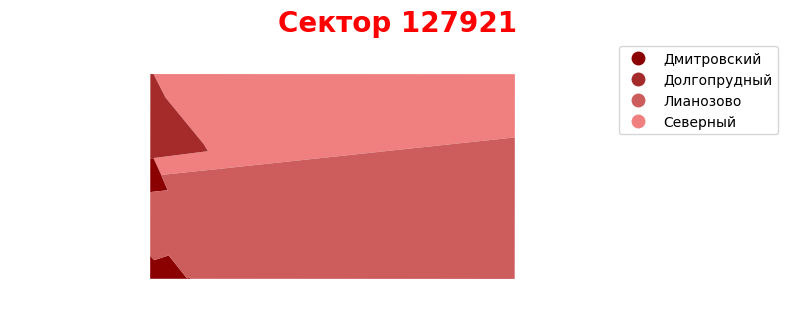

In [450]:
# вывод геоданных по сектору 127921
adm[adm['cell_zid'] == 127921].plot(column = 'adm_name', linewidth=0.5, cmap=rvb, legend=True, figsize=[10,10])
plt.xlim(37.533,37.55)
plt.ylim(55.904, 55.91)
plt.title('Сектор 127921', loc='center', fontweight='bold', color='r', fontsize=20)
plt.box(on=None)
plt.xticks([])
plt.yticks([])
plt.show()

**Гипотеза подтвердилась.** Идентификаторы секторов с одинаковым значением являются границами административных районов. При этом площадь секторов соответствующих административных районов **НЕ** пропорциональна друг другу. 

In [43]:
adm.head()

,geometry,cell_zid,adm_name,okrug_name,sub_ter,area
0,"MULTIPOLYGON (((38.650 54.260, 38.655 54.260, ...",0,Серебряные пруды,Серебряные пруды,Московская область,0.000007
1,"MULTIPOLYGON (((38.655 54.257, 38.655 54.260, ...",1,Серебряные пруды,Серебряные пруды,Московская область,0.000027
2,"MULTIPOLYGON (((38.663 54.256, 38.663 54.260, ...",2,Серебряные пруды,Серебряные пруды,Московская область,0.000023
3,"MULTIPOLYGON (((38.670 54.257, 38.670 54.260, ...",3,Серебряные пруды,Серебряные пруды,Московская область,0.000014
4,"MULTIPOLYGON (((38.678 54.258, 38.678 54.259, ...",4,Серебряные пруды,Серебряные пруды,Московская область,0.000004


In [440]:
# считывание данных с изменениями численности населения Московской агломерации
clocation = pd.read_csv('data/01_Clocation_202109.csv')

In [441]:
# вывод данных
clocation.head()

,dt,zid,customers_cnt_home,customers_cnt_job,customers_cnt_day,customers_cnt_night
0,2021-09-30,32909,1,0,0,3
1,2021-09-30,32910,2,0,0,4
2,2021-09-30,33261,0,0,0,2
3,2021-09-30,33262,1,0,0,5
4,2021-09-30,33263,0,0,0,4


In [442]:
# случайная выборка сектора
np.random.choice(unique[counts > 3], 1)

array([114406], dtype=int64)

In [443]:
# объединение данных
adm[adm['cell_zid'] == 114406].merge(clocation, left_on='cell_zid', right_on='zid')

,geometry,cell_zid,adm_name,okrug_name,sub_ter,area,dt,zid,customers_cnt_home,customers_cnt_job,customers_cnt_day,customers_cnt_night
0,"MULTIPOLYGON (((37.503 55.792, 37.504 55.792, ...",114406,Сокол,Северный административный округ,Старая Москва,0.250000,2021-09-30,114406,2536,1974,2792,3695
1,"MULTIPOLYGON (((37.496 55.788, 37.496 55.792, ...",114406,Щукино,Северо-Западный административный округ,Старая Москва,0.250000,2021-09-30,114406,2536,1974,2792,3695
2,"MULTIPOLYGON (((37.496 55.788, 37.496 55.788, ...",114406,Хорошево-Мневники,Северо-Западный административный округ,Старая Москва,0.250000,2021-09-30,114406,2536,1974,2792,3695
3,"MULTIPOLYGON (((37.504 55.791, 37.504 55.789, ...",114406,Хорошевский,Северный административный округ,Старая Москва,0.250000,2021-09-30,114406,2536,1974,2792,3695


На примере сектора 114406 видно, что значение параметров изменения численности будут дублироваться. А это приведет к искожению статистики при анализе данных.

In [444]:
# вывод количества дубляжей по секторам
adm['cell_zid'].value_counts()[:10]

114417    5
92031     5
107516    5
81220     4
97406     4
90882     4
121965    4
90901     4
67631     4
120384    4
Name: cell_zid, dtype: int64

In [445]:
# создание словаря с количеством дублежей по секторам
data_zid = dict(zip(adm['cell_zid'].value_counts().index, adm['cell_zid'].value_counts().values))

In [446]:
# создание признака с количеством дубляжа сектора
adm['conts_zid'] = adm['cell_zid'].map(data_zid)

In [447]:
# запись измененного файла
adm.to_csv('data_clean/adm.csv', index=False)